In [65]:
import pandas as pd
import numpy as np
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')
print(star_wars.head(10))
star_wars.shape

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

(1187, 38)

In [66]:
list(star_wars)
star_wars['RespondentID'].isnull().value_counts()

False    1186
True        1
Name: RespondentID, dtype: int64

In [67]:
star_wars = star_wars[star_wars['RespondentID'].notnull() ==True]
star_wars.shape

(1186, 38)

In [68]:
yes_no = {'Yes': True, 'yes': True, 'YES':True, 'No':False, 'NO':False, 'no':False}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [69]:
#this will be slightly more efficient
new_names = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
             'Unnamed: 4': 'seen_2',
             'Unnamed: 5': 'seen_3',
             'Unnamed: 6': 'seen_4',
             'Unnamed: 7': 'seen_5',
             'Unnamed: 8': 'seen_6'}
new_map = {'Star Wars: Episode I  The Phantom Menace':True,
          'Star Wars: Episode II  Attack of the Clones':True,
          'Star Wars: Episode III  Revenge of the Sith':True,
          'Star Wars: Episode IV  A New Hope':True,
          'Star Wars: Episode V The Empire Strikes Back':True,
          'Star Wars: Episode VI Return of the Jedi':True,
          np.nan:False}
star_wars = star_wars.rename(new_names)
for col in star_wars.columns[3:9]:  
    star_wars[col]=star_wars[col].map(new_map)
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [70]:
ranking_names = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
                'Unnamed: 10':'ranking_2',
                'Unnamed: 11':'ranking_3',
                'Unnamed: 12':'ranking_4',
                'Unnamed: 13':'ranking_5',
                'Unnamed: 14':'ranking_6'}
star_wars = star_wars.rename(columns=ranking_names)
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star

<BarContainer object of 6 artists>

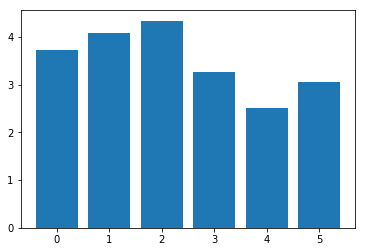

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings=star_wars[star_wars.columns[9:15]].mean()
plt.bar(range(6),ratings)

Which of the following Star Wars films have you seen? Please select all that apply.    673
Unnamed: 4                                                                             571
Unnamed: 5                                                                             550
Unnamed: 6                                                                             607
Unnamed: 7                                                                             758
Unnamed: 8                                                                             738
dtype: int64

<BarContainer object of 6 artists>

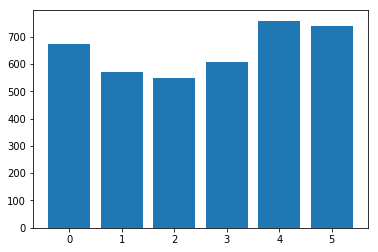

In [72]:
seen= star_wars[star_wars.columns[3:9]].sum()
display(seen)
plt.bar(range(6), seen)

Text(0.5,0,'Non-Trekkies')

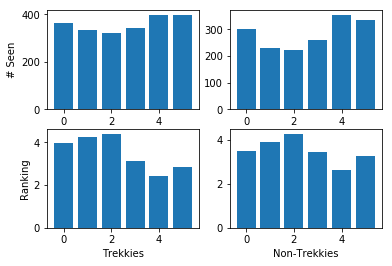

In [75]:
trekie = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']=='Yes']
nontrekie = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']=='No']
trek_seen=trekie[trekie.columns[3:9]].sum()
trek_rank=trekie[trekie.columns[9:15]].mean()
nontrek_seen=nontrekie[nontrekie.columns[3:9]].sum()
nontrek_rank=nontrekie[nontrekie.columns[9:15]].mean()
fig, ax = plt.subplots()

ax1=plt.subplot(2,2,1)
plt.bar(range(6), trek_seen)
plt.ylabel('# Seen')

plt.subplot(2,2,2, sharex=ax1)
plt.bar(range(6), nontrek_seen)

plt.subplot(2,2,3)
plt.bar(range(6), trek_rank)
plt.ylabel('Ranking')
plt.xlabel('Trekkies')

plt.subplot(2,2,4)
plt.bar(range(6), nontrek_rank)
plt.xlabel('Non-Trekkies')

In [ ]:
#Trekkies are heathens who rank the old (ie GOOD) Star Wars movies poorly